In [1]:
import inputs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
import librosa
import librosa.display
import IPython.display as ipd

F:\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
F:\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).ep

In [3]:
import cv2

In [7]:
X_train, X_test, y_train, y_test = inputs.getTrainTestNums()

F:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_int = np.zeros((n_samples, n_features), dtype=np.int)
F:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:111: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https:

In [13]:
img = cv2.imread('Data/images_original/blues/blues00000.png')
print(img.shape)
cv2.imshow("image",img)

cv2.waitKey(0) 
cv2.destroyAllWindows() 

(288, 432, 3)


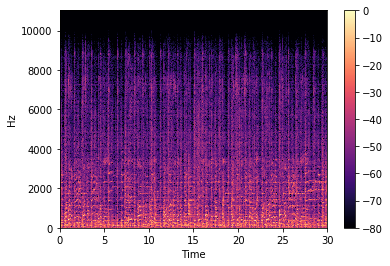

In [12]:
y, sr= librosa.load('Data/genres_original/blues/blues.00000.wav')
Xdb = librosa.amplitude_to_db(np.abs(librosa.stft(y)),ref=np.max)
librosa.display.specshow(Xdb,sr=sr,x_axis='time',y_axis='hz')

plt.colorbar()

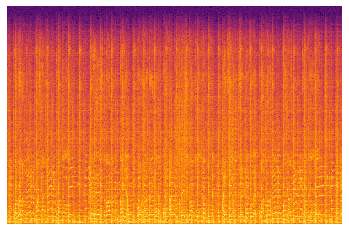

In [16]:
cmap = plt.get_cmap('inferno')

plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
plt.axis('off');

In [4]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [5]:
x=[]
y=[]
for index_num,row in tqdm(dataset.iterrows()):
    try:
        file_name = os.path.join(os.path.abspath("Data/genres_original/"),str(row["label"])+'/',str(row["filename"]))
        final_class_labels=str(row["label"])
        data=features_extractor(file_name)
        x.append(data)
        y.append(final_class_labels)
    except:
        print("An exception occurred in index",index_num,": ",str(row["filename"]))


554it [01:02,  9.35it/s]F:\Anaconda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


An exception occurred in index 554 :  jazz.00054.wav


1000it [01:52,  8.86it/s]


In [19]:
# Save data to file
df = pd.DataFrame(x)
df2 = pd.DataFrame(y)
df.to_csv("Data/features_mfcc.csv",index=False)
df2.to_csv("Data/lables.csv",index=False)

# USING FEAURES OF DATASET

In [5]:
X = dataset.values[:,2:-1]
y = dataset.values[:,-1]

In [23]:
X = np.array(x)
y = np.array(y)

In [6]:
print(X.shape, y.shape)

(1000, 57) (1000,)


In [7]:
X

array([[0.3500881195068359, 0.0887565687298774, 0.1302279233932495, ...,
        55.06292343139648, 1.2212907075881958, 46.93603515625],
       [0.3409135937690735, 0.0949802547693252, 0.0959478095173835, ...,
        51.1061897277832, 0.5312165021896362, 45.78628158569336],
       [0.3636371791362762, 0.0852751955389976, 0.1755704134702682, ...,
        46.6396598815918, -2.2312583923339844, 30.57302474975586],
       ...,
       [0.4321420192718506, 0.0752684995532035, 0.0816509798169136, ...,
        42.502201080322266, -2.1063365936279297, 29.865514755249023],
       [0.3624845743179321, 0.0915055274963378, 0.0838599354028701, ...,
        47.22718048095703, -3.5906436443328857, 41.29908752441406],
       [0.3584013283252716, 0.0858840942382812, 0.0544540286064147, ...,
        72.18931579589844, 1.1552391052246094, 49.66250991821289]],
      dtype=object)

In [34]:
X = X.tolist()
y = y.tolist()
y = np.reshape(y,(-1,1)).tolist()

AttributeError: 'list' object has no attribute 'tolist'

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
# read from file
dfx = pd.read_csv("Data/features_mfcc.csv",)
dfy = pd.read_csv("Data/lables.csv")
x = dfx.values.tolist()
y = dfy.values.tolist()

In [9]:
ohe = OneHotEncoder()
y = dataset.values[:,-1]
y = ohe.fit_transform(y.reshape(-1,1)).toarray()

F:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:395: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  check_array(X, dtype=np.int)
F:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note 

## using lable encoder

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(np.array(X,dtype=float))

# encoder = LabelEncoder()
# y = encoder.fit_transform(y)

In [17]:
# print(X)
# print(y)
print(np.shape(X))
print(np.shape(y))

(1000, 57)
(1000, 10)


In [42]:
print(y.shape)

(1000,)


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [123]:
X_train = np.array(X_train).tolist()
X_test = np.array(X_test).tolist()
y_train = np.array(y_train).tolist()
y_test = np.array(y_test).tolist()

In [126]:
X_test[0]

array([-0.43143991, -0.57667901, -0.38309761, -0.70791074, -0.36620896,
       -0.77611863, -0.68629158, -0.47699934, -0.52289573, -0.6925927 ,
       -0.1265887 , -0.76141018,  0.21731172, -0.37252145,  0.35265474,
       -0.66718745, -0.57153859,  0.29665394, -0.9917553 ,  0.63016018,
       -0.52310189, -1.92879663, -0.87346206,  0.37945128, -0.72753951,
       -0.45481257, -0.81671942,  0.42778579, -0.60096839, -1.18305814,
       -0.99300621,  0.88598445, -1.03808091, -1.25745107, -0.94279054,
        1.2061426 , -0.41165067, -0.71090269, -0.84615278,  0.3252476 ,
       -1.0210671 , -1.77838039, -0.69381279,  0.35143143, -0.38186149,
       -0.79957164, -0.52011516,  0.486756  , -0.83094117, -0.81893428,
       -0.88795419,  0.28478069, -0.8454922 , -2.2308956 , -0.45656322,
        0.1440476 , -0.59445324])

In [127]:
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(800, 57)
(200, 57)
(800, 10)
(200, 10)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.applications.vgg16 import VGG16

In [9]:
y_train.shape

(800, 10)

In [52]:
model = Sequential()


# first layer
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# second layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# third layer 
model.add(Dense(125))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# final layer
model.add(Dense(y_train.shape[1]))
model.add(Activation('softmax'))

In [18]:
# Second model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               14848     
                                                                 
 activation_8 (Activation)   (None, 256)               0         
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               131584    
                                                                 
 activation_9 (Activation)   (None, 512)               0         
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 125)              

In [54]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [53]:
accuracy = []
val_accuracy = []
val_loss = []
loss = []

In [55]:
epochs = 50
batch_size = 128
checkpointer = ModelCheckpoint(filepath='saved_models/genre_classification_scaled.hdf5',
                              verbose = 1, saved_best_only=True)
start = datetime.now()

history = model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,y_test),callbacks=[checkpointer],verbose=1)

print("Training compiled in time: ",(datetime.now() - start))

Epoch 1/50
1/7 [===>..........................] - ETA: 3s - loss: 2.9180 - accuracy: 0.0625
Epoch 00001: saving model to saved_models\genre_classification_scaled.hdf5
7/7 [==============================] - 1s 35ms/step - loss: 2.4463 - accuracy: 0.1338 - val_loss: 2.1002 - val_accuracy: 0.3050
Epoch 2/50
1/7 [===>..........................] - ETA: 0s - loss: 2.1648 - accuracy: 0.2188
Epoch 00002: saving model to saved_models\genre_classification_scaled.hdf5
7/7 [==============================] - 0s 14ms/step - loss: 2.1107 - accuracy: 0.2425 - val_loss: 1.9363 - val_accuracy: 0.3700
Epoch 3/50
1/7 [===>..........................] - ETA: 0s - loss: 1.9868 - accuracy: 0.2812
Epoch 00003: saving model to saved_models\genre_classification_scaled.hdf5
7/7 [==============================] - 0s 14ms/step - loss: 1.9271 - accuracy: 0.3250 - val_loss: 1.7759 - val_accuracy: 0.3900
Epoch 4/50
1/7 [===>..........................] - ETA: 0s - loss: 1.8689 - accuracy: 0.3672
Epoch 00004: saving mod

In [56]:
accuracy.extend(history.history['accuracy'])
val_accuracy.extend(history.history['val_accuracy'])
loss.extend(history.history['loss'])
val_loss.extend(history.history['val_loss'])

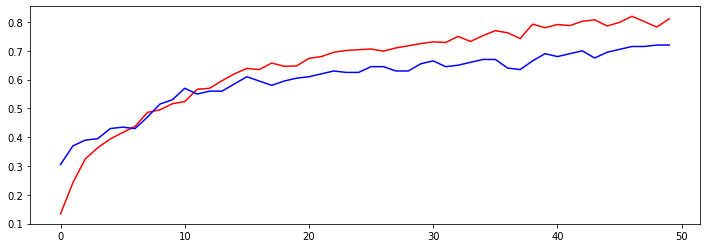

In [66]:
plt.figure(figsize=(12,4))
plt.plot(accuracy,color='red')
plt.plot(val_accuracy,color='blue')

In [59]:
y_pred = model.predict(X_test)
y_pred.shape

(200, 10)

In [77]:
y_pred = [[round(j) for j in i] for i in y_pred]

In [73]:
type(y_test[0][0])

numpy.float64

In [68]:
filename = "Data/genres_original/blues/blues.00004.wav"

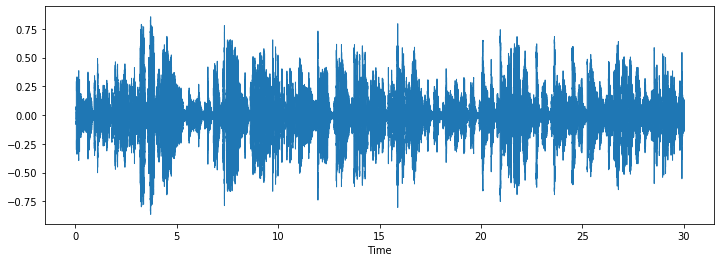

In [69]:
plt.figure(figsize=(12,4))
y, sr = librosa.load(filename)
librosa.display.waveshow(y,sr=sr)
ipd.Audio(filename)

In [70]:
x = features_extractor(filename)
x

array([-2.3520070e+02,  1.2387179e+02, -2.2546125e+01,  5.2951664e+01,
       -1.4538217e+00,  2.4660501e+01, -7.0884686e+00,  1.4890093e+01,
       -1.2783056e+01,  1.6718227e+01, -2.9434743e+00,  1.0081296e+01,
       -1.5028537e+01,  3.1190755e+00, -7.1235499e+00,  1.7955861e+00,
       -7.0771794e+00,  2.3404576e-02, -2.0338805e+00,  1.1501093e+00,
       -5.1028485e+00, -1.9207368e+00, -2.4087031e+00, -5.8205552e+00,
       -1.2543035e+01, -9.1261816e+00,  5.6508813e+00,  3.6848621e+00,
        3.1544313e+00, -8.8116045e+00, -7.8562827e+00, -4.7498770e+00,
       -3.3666071e-01, -8.2353621e+00, -4.7341542e+00, -6.6724610e+00,
       -5.7475905e+00, -5.9541821e+00, -5.2539744e+00,  1.7758619e+00],
      dtype=float32)

In [86]:
model.score()

AttributeError: 'Sequential' object has no attribute 'score'

In [84]:
ohe.categories_

[array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
        'metal', 'pop', 'reggae', 'rock'], dtype=object)]

# KNN

In [12]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [89]:
X = dataset.values[:,2:-1]
y = dataset.values[:,-1]
y = ohe.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

ValueError: Expected 2D array, got 1D array instead:
array=['blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues' 'blues'
 'blues' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'classical'
 'classical' 'classical' 'classical' 'classical' 'classical' 'country'
 'country' 'country' 'country' 'country' 'country' 'country' 'country'
 'country' 'country' 'country' 'country' 'country' 'country' 'country'
 'country' 'country' 'country' 'country' 'country' 'country' 'country'
 'country' 'country' 'country' 'country' 'country' 'country' 'country'
 'country' 'country' 'country' 'country' 'country' 'country' 'country'
 'country' 'country' 'country' 'country' 'country' 'country' 'country'
 'country' 'country' 'country' 'country' 'country' 'country' 'country'
 'country' 'country' 'country' 'country' 'country' 'country' 'country'
 'country' 'country' 'country' 'country' 'country' 'country' 'country'
 'country' 'country' 'country' 'country' 'country' 'country' 'country'
 'country' 'country' 'country' 'country' 'country' 'country' 'country'
 'country' 'country' 'country' 'country' 'country' 'country' 'country'
 'country' 'country' 'country' 'country' 'country' 'country' 'country'
 'country' 'country' 'country' 'country' 'country' 'country' 'country'
 'country' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco'
 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco'
 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco'
 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco'
 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco'
 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco'
 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco'
 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco'
 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco'
 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco'
 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco' 'disco'
 'disco' 'disco' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop'
 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'hiphop' 'jazz' 'jazz'
 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz'
 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz'
 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz'
 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz'
 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz'
 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz'
 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz'
 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz'
 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz'
 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'jazz' 'metal' 'metal'
 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal'
 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal'
 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal'
 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal'
 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal'
 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal'
 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal'
 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal'
 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal'
 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal'
 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'metal' 'pop'
 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop'
 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop'
 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop'
 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop'
 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop'
 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop'
 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop'
 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop' 'pop'
 'pop' 'pop' 'pop' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae'
 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae'
 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae'
 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae'
 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae'
 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae'
 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae'
 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae'
 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae'
 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae'
 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae'
 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae'
 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'reggae' 'rock' 'rock'
 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock'
 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock'
 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock'
 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock'
 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock'
 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock'
 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock'
 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock'
 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock'
 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock' 'rock'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [26]:
knn_accuracy = []

In [27]:
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    knn_accuracy.append(accuracy_score(np.array(y_test),y_pred))

F:\Anaconda\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
F:\Anaconda\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link 

F:\Anaconda\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
F:\Anaconda\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link 

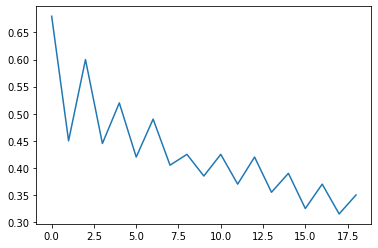

In [28]:
plt.plot(knn_accuracy)

In [21]:
print(y_pred)
print(np.shape(y_pred))

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(200, 10)


In [80]:
accuracy_score(np.array(y_test),np.array(y_pred,dtype='float64'))

0.71

In [71]:
cm = multilabel_confusion_matrix(ohe.inverse_transform(np.array(y_test)),ohe.inverse_transform(y_pred),labels=ohe.categories_[0])
print(cm)

[[[114  72]
  [  3  11]]

 [[185   4]
  [  2   9]]

 [[170   4]
  [ 21   5]]

 [[172   4]
  [ 19   5]]

 [[168   5]
  [ 22   5]]

 [[173  11]
  [  9   7]]

 [[180   2]
  [  3  15]]

 [[175   2]
  [ 10  13]]

 [[172   7]
  [ 10  11]]

 [[176   4]
  [ 16   4]]]


In [72]:
ohe.categories_[0]

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [97]:
# XGB Classifier

In [99]:
from sklearn.svm import SVC

In [100]:
svm = SVC(decision_function_shape="ovo")
svm.fit(X_train,y_train)
y_pred = model.predict(X_test)

F:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [104]:
svm.score(X_test,y_test)

0.665